Test Accuracy: 0.8059701492537313
Train Accuracy: 0.706766917293233


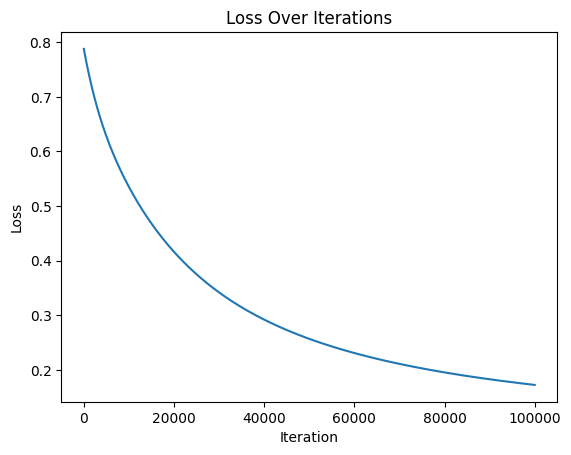

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# uploaded = files.upload()
data = pd.read_csv('penguins.csv')
data = data.dropna()
data['species'] = data['species'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes


def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

data['bill_length_mm'] = normalize_column(data['bill_length_mm'])
data['bill_depth_mm'] = normalize_column(data['bill_depth_mm'])
data['flipper_length_mm'] = normalize_column(data['flipper_length_mm'])
data['body_mass_g'] = normalize_column(data['body_mass_g'])

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def cost(self, y, y_pred):
        m = len(y)
        return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    def gradient_descent(self, X, y, y_pred):
        m = len(y)
        gradient = np.dot(X.T, (y_pred - y)) / m
        return gradient
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.loss = []
        for _ in range(self.iterations):
            z = np.dot(X, self.weights)
            y_pred = self.sigmoid(z)
            grad = self.gradient_descent(X, y, y_pred)
            self.weights -= self.learning_rate * grad
            cost = self.cost(y, y_pred)
            self.loss.append(cost)
    def predict(self, X):
        z = np.dot(X, self.weights)
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)


# Choose your target variable (e.g., 'sex' or 'island') and create X and y
target_column = 'island'  # Choose the target variable you want to predict
X = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].values

# y = (data[target_column] == 'sex').astype(int)
y = data['island'].astype('category').cat.codes
y = y.reset_index(drop=True)

num_samples = X.shape[0]
indices = np.random.permutation(num_samples)
split_ratio = 0.8
split_idx = int(num_samples * split_ratio)

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


# # Split the dataset into training and test sets
# # split_ratio = 0.8
# # split_idx = int(X.shape[0] * split_ratio)
# # X_train, X_test = X[:split_idx], X[split_idx:]
# # y_train, y_test = y[:split_idx], y[split_idx:]


# # Create and train the model
learning_rate = 1e-3
iterations = 100000
model = LogisticRegression(learning_rate, iterations)
model.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = model.predict(X_test)
model = LogisticRegression(learning_rate, iterations)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)

y_pred1 = model.predict(X_train)
accuracy = np.mean(y_pred1 == y_train)
print("Train Accuracy:", accuracy)

# Plot the loss over iterations
plt.plot(range(iterations), model.loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()



Test Accuracy: 0.7014925373134329
Train Accuracy: 0.7330827067669173


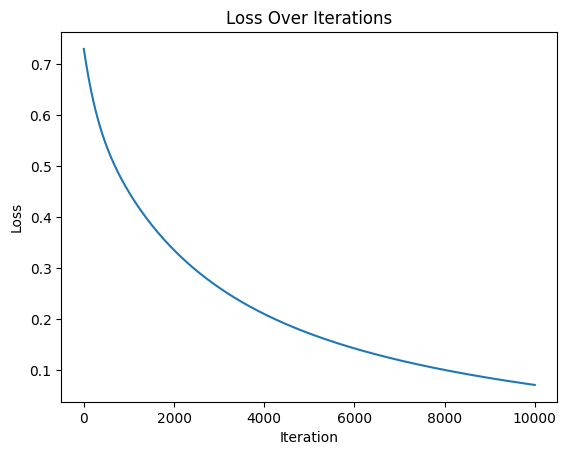

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# uploaded = files.upload()
data = pd.read_csv('penguins.csv')
data = data.dropna()
data['species'] = data['species'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes


def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

data['bill_length_mm'] = normalize_column(data['bill_length_mm'])
data['bill_depth_mm'] = normalize_column(data['bill_depth_mm'])
data['flipper_length_mm'] = normalize_column(data['flipper_length_mm'])
data['body_mass_g'] = normalize_column(data['body_mass_g'])

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def cost(self, y, y_pred):
        m = len(y)
        return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    def gradient_descent(self, X, y, y_pred):
        m = len(y)
        gradient = np.dot(X.T, (y_pred - y)) / m
        return gradient
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.loss = []
        for _ in range(self.iterations):
            z = np.dot(X, self.weights)
            y_pred = self.sigmoid(z)
            grad = self.gradient_descent(X, y, y_pred)
            self.weights -= self.learning_rate * grad
            cost = self.cost(y, y_pred)
            self.loss.append(cost)
    def predict(self, X):
        z = np.dot(X, self.weights)
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)


# Choose your target variable (e.g., 'sex' or 'island') and create X and y
target_column = 'island'  # Choose the target variable you want to predict
X = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].values

# y = (data[target_column] == 'sex').astype(int)
y = data['island'].astype('category').cat.codes
y = y.reset_index(drop=True)

num_samples = X.shape[0]
indices = np.random.permutation(num_samples)
split_ratio = 0.8
split_idx = int(num_samples * split_ratio)

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


# # Split the dataset into training and test sets
# # split_ratio = 0.8
# # split_idx = int(X.shape[0] * split_ratio)
# # X_train, X_test = X[:split_idx], X[split_idx:]
# # y_train, y_test = y[:split_idx], y[split_idx:]


# # Create and train the model
learning_rate = 1e-2
iterations = 10000
model = LogisticRegression(learning_rate, iterations)
model.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = model.predict(X_test)
model = LogisticRegression(learning_rate, iterations)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)

y_pred1 = model.predict(X_train)
accuracy = np.mean(y_pred1 == y_train)
print("Train Accuracy:", accuracy)

# Plot the loss over iterations
plt.plot(range(iterations), model.loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()


Test Accuracy: 0.6567164179104478
Train Accuracy: 0.7443609022556391


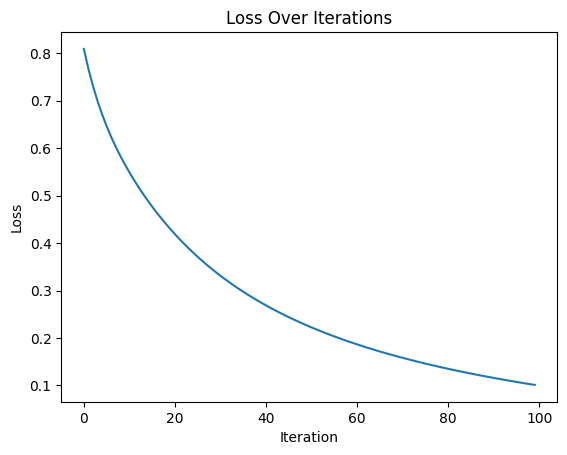

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#uploaded = files.upload()
data = pd.read_csv('penguins.csv')
data = data.dropna()
data['species'] = data['species'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes


def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

data['bill_length_mm'] = normalize_column(data['bill_length_mm'])
data['bill_depth_mm'] = normalize_column(data['bill_depth_mm'])
data['flipper_length_mm'] = normalize_column(data['flipper_length_mm'])
data['body_mass_g'] = normalize_column(data['body_mass_g'])

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def cost(self, y, y_pred):
        m = len(y)
        return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    def gradient_descent(self, X, y, y_pred):
        m = len(y)
        gradient = np.dot(X.T, (y_pred - y)) / m
        return gradient
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.loss = []
        for _ in range(self.iterations):
            z = np.dot(X, self.weights)
            y_pred = self.sigmoid(z)
            grad = self.gradient_descent(X, y, y_pred)
            self.weights -= self.learning_rate * grad
            cost = self.cost(y, y_pred)
            self.loss.append(cost)
    def predict(self, X):
        z = np.dot(X, self.weights)
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)


# Choose your target variable (e.g., 'sex' or 'island') and create X and y
target_column = 'island'  # Choose the target variable you want to predict
X = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].values

# y = (data[target_column] == 'sex').astype(int)
y = data['island'].astype('category').cat.codes
y = y.reset_index(drop=True)

num_samples = X.shape[0]
indices = np.random.permutation(num_samples)
split_ratio = 0.8
split_idx = int(num_samples * split_ratio)

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


# # Split the dataset into training and test sets
# # split_ratio = 0.8
# # split_idx = int(X.shape[0] * split_ratio)
# # X_train, X_test = X[:split_idx], X[split_idx:]
# # y_train, y_test = y[:split_idx], y[split_idx:]


# # Create and train the model
learning_rate = 0.8
iterations = 100
model = LogisticRegression(learning_rate, iterations)
model.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = model.predict(X_test)
model = LogisticRegression(learning_rate, iterations)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)

y_pred1 = model.predict(X_train)
accuracy = np.mean(y_pred1 == y_train)
print("Train Accuracy:", accuracy)

# Plot the loss over iterations
plt.plot(range(iterations), model.loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()
